<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Neural Networks - Module Project-IV | SVHN Digit Recognizer</span></h1>

<ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Autonomous Vehicles</span>
    </li>
</ul>
<p><br></p>

<ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">Recognising multi-digit numbers in photographs captured at street level is an
important component of modern-day map making. A classic example of a corpus of such street-level
photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree
panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the
transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of
the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the
optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text
recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the
visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and
character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows,
specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.
In this project, we will use the dataset with images centred around a single digit (many of the images do
contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more
complex than MNIST because of the distractors.</font>
</article>

<ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong></span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder,
unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from
house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files.
<br>    
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading
Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and
Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary<br>
    10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.</span></article>

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We will build a digit classifier on the SVHN (Street View Housing Number) dataset</span></p>
<p><br></p>

In [1]:
# imports

import h5py
import warnings
import tensorflow
from time import time
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

%matplotlib inline

tensorflow.__version__

'2.5.0'

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import the data.</span></strong></li>
</ul>

In [2]:
h5file = h5py.File("./Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5", 'r')

h5file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [3]:
# access the data in the hd5f file
X_test = h5file['X_test'][:]
X_train = h5file['X_train'][:]
X_val = h5file['X_val'][:]
y_test = h5file['y_test'][:]
y_train = h5file['y_train'][:]
y_val = h5file['y_val'][:]

h5file.close()  # close h5file

In [4]:
X_train.shape, X_val.shape, X_test.shape

((42000, 32, 32), (60000, 32, 32), (18000, 32, 32))

In [5]:
y_train.shape, y_val.shape, y_test.shape

((42000,), (60000,), (18000,))

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We have 42,000 training samples, 60,000 validation samples and 18,000 samples for final out-of-sample testing. Total of 1,20,000 images</span></p>

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Data pre-processing and visualisation.</span></strong></li>
</ul>

In [6]:
print(X_train[0].shape)  # images of 32 x 32
X_train[0]

(32, 32)


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Plotting distribution of target</span></p>

In [7]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64

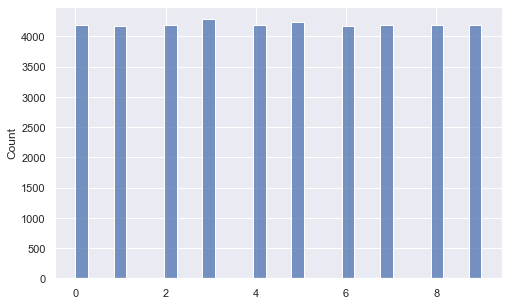

In [8]:
sns.set()
fig = plt.figure(figsize=(8, 5))
sns.histplot(y_train_series)
plt.show()

In [9]:
y_val_series = pd.Series(y_val)
y_val_series.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

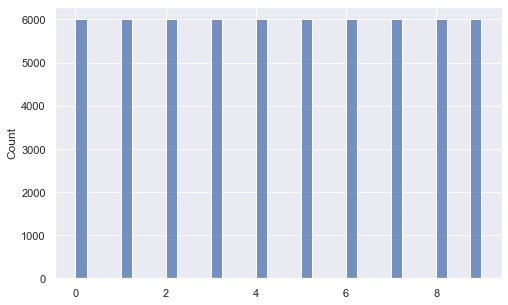

In [10]:
sns.set()
fig = plt.figure(figsize=(8, 5))
sns.histplot(y_val_series)
plt.show()

In [11]:
y_test_series = pd.Series(y_test)
y_test_series.value_counts()

6    1832
1    1828
0    1814
4    1812
8    1812
7    1808
9    1804
2    1803
5    1768
3    1719
dtype: int64

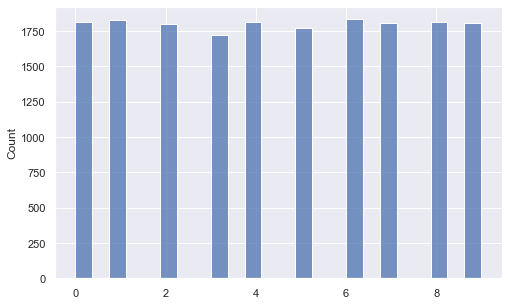

In [12]:
sns.set()
fig = plt.figure(figsize=(8, 5))
sns.histplot(y_test_series)
plt.show()

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Hence, we can see that the distribution of classes in labels is more or less the same. No Imbalanced classes problem</span></p>

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Plotting a few images: </span></p>

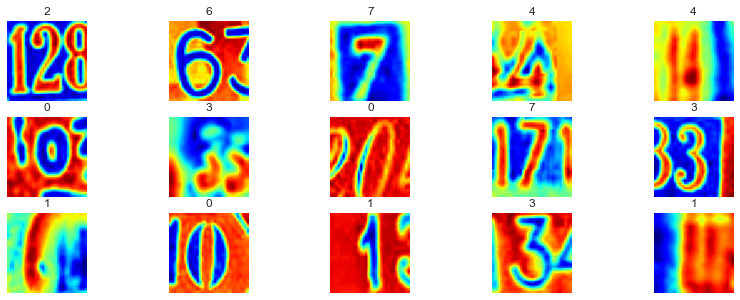

In [13]:
fig = plt.figure(figsize=(14, 5))
c = 5
r = 3
for i in range(1, c*r+1):
    img = X_train[i-1].reshape((32, 32))
    fig.add_subplot(r, c, i)
    plt.gca().set_title(y_train[i - 1])
    plt.gca().axis('off')
    plt.imshow(img, cmap="jet")
plt.show()

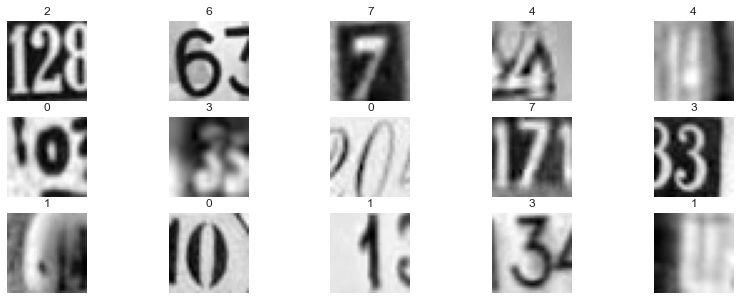

In [14]:
fig = plt.figure(figsize=(14, 5))
c = 5
r = 3
for i in range(1, c*r+1):
    img = X_train[i-1].reshape((32, 32))
    fig.add_subplot(r, c, i)
    plt.gca().set_title(y_train[i - 1])
    plt.gca().axis('off')
    plt.imshow(img, cmap="gray")
plt.show()

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Preprocessing: </span></p>

In [15]:
# reshape dataset to have a single channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1
print(width, height, channels)

X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
X_val = X_val.reshape((X_val.shape[0], width, height, channels))

32 32 1


In [16]:
# ImageDataGenerator requires rank 4 input matrix (Image Index, height, widht, depth)
X_train.shape, X_val.shape, X_test.shape

((42000, 32, 32, 1), (60000, 32, 32, 1), (18000, 32, 32, 1))

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Data Augmentation:</span></p>

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator class can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.
# featurewise_center: calculating of the mean calculated on the training set
# featurewise_std_normalization: subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.
# rotation_range: angle between which the images are rotated to get new image after rotation
# shift_ranges: shift the images slightly
# zoom_range: randomly zooms into the image

tr_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.05,
    zoom_range=0.12,
    height_shift_range=0.02,
    width_shift_range=0.04,
    brightness_range=[0.1, 0.9]
    )


# create new generator for validation
val_datagen = ImageDataGenerator()    # don't perform augmentation on validation data

# compute quantities required for featurewise normalization
tr_datagen.fit(X_train)
val_datagen.fit(X_val)

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [19]:
y_train[0] # One-hot vector

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Design, train, tune and test a neural network image classifier.</span></strong></li>
</ul>

In [20]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout

In [21]:
# build the model
input_dim = X_train.shape[1]
num_classes = 10
learning_rate = 1e-4

adam = optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(num_classes),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [22]:
epochs = 200
batch_size = 2048

from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping

# To simplify the log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f} | Validation Acc: {l['val_accuracy']:.5f}", end =" >|> \n" ))

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=15,
                           verbose=1, 
                           restore_best_weights=True)

history = model.fit(tr_datagen.flow(X_train, y_train,
                                    batch_size=batch_size, 
                                    seed=77,
                                    shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    validation_data=(X_test, y_test),
                    callbacks = [early_stop, simple_log],
                    verbose=False)

 ~| Epoch: 1 | Validation Loss: 132.63965 | Validation Acc: 0.09756 >|> 
 ~| Epoch: 2 | Validation Loss: 113.75845 | Validation Acc: 0.10506 >|> 
 ~| Epoch: 3 | Validation Loss: 115.28979 | Validation Acc: 0.10533 >|> 
 ~| Epoch: 4 | Validation Loss: 90.65070 | Validation Acc: 0.12172 >|> 
 ~| Epoch: 5 | Validation Loss: 77.92985 | Validation Acc: 0.12567 >|> 
 ~| Epoch: 6 | Validation Loss: 57.23776 | Validation Acc: 0.16150 >|> 
 ~| Epoch: 7 | Validation Loss: 45.14696 | Validation Acc: 0.21067 >|> 
 ~| Epoch: 8 | Validation Loss: 45.66247 | Validation Acc: 0.21567 >|> 
 ~| Epoch: 9 | Validation Loss: 41.32023 | Validation Acc: 0.23728 >|> 
 ~| Epoch: 10 | Validation Loss: 33.89695 | Validation Acc: 0.24883 >|> 
 ~| Epoch: 11 | Validation Loss: 29.75039 | Validation Acc: 0.27783 >|> 
 ~| Epoch: 12 | Validation Loss: 29.73769 | Validation Acc: 0.29239 >|> 
 ~| Epoch: 13 | Validation Loss: 26.42259 | Validation Acc: 0.31189 >|> 
 ~| Epoch: 14 | Validation Loss: 24.94556 | Validation Ac

 ~| Epoch: 115 | Validation Loss: 4.72733 | Validation Acc: 0.75744 >|> 
 ~| Epoch: 116 | Validation Loss: 4.92163 | Validation Acc: 0.75033 >|> 
 ~| Epoch: 117 | Validation Loss: 5.02684 | Validation Acc: 0.75806 >|> 
 ~| Epoch: 118 | Validation Loss: 4.94856 | Validation Acc: 0.75583 >|> 
 ~| Epoch: 119 | Validation Loss: 4.88133 | Validation Acc: 0.75011 >|> 
 ~| Epoch: 120 | Validation Loss: 4.82753 | Validation Acc: 0.76539 >|> 
 ~| Epoch: 121 | Validation Loss: 4.78017 | Validation Acc: 0.75944 >|> 
 ~| Epoch: 122 | Validation Loss: 4.74164 | Validation Acc: 0.76461 >|> 
 ~| Epoch: 123 | Validation Loss: 4.86397 | Validation Acc: 0.76111 >|> 
 ~| Epoch: 124 | Validation Loss: 4.83324 | Validation Acc: 0.76722 >|> 
 ~| Epoch: 125 | Validation Loss: 4.64908 | Validation Acc: 0.76350 >|> 
 ~| Epoch: 126 | Validation Loss: 4.70638 | Validation Acc: 0.76228 >|> 
 ~| Epoch: 127 | Validation Loss: 4.70614 | Validation Acc: 0.76428 >|> 
 ~| Epoch: 128 | Validation Loss: 4.87343 | Validat

In [23]:
def plot_learning_curve(hist, metric='loss'):
    sns.set()
    plt.figure(figsize=(5, 4))
    train = hist.history[metric]
    val = hist.history[f'val_{metric}']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation')
    plt.title(f"{metric.capitalize()} vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [24]:
test_iterator = tr_datagen.flow(X_test, y_test, batch_size=batch_size)
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=1)
print('Test Accuracy: %.1f' % (acc * 100))

9/9 [==============================] - 6s 598ms/step - loss: 0.6187 - accuracy: 0.8110
Test Accuracy: 81.1



<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of
epochs plot.</span></strong></li>
</ul>

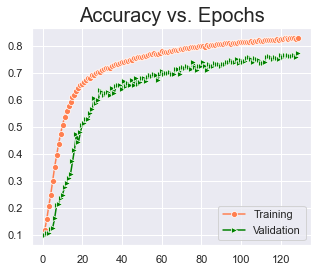

In [25]:
plot_learning_curve(history, metric='accuracy')

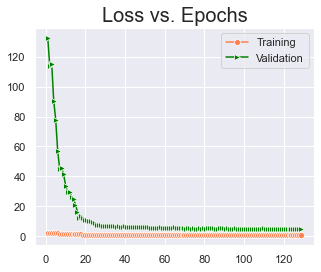

In [26]:
plot_learning_curve(history, metric='loss')

Text(57.5, 0.5, 'True Values')

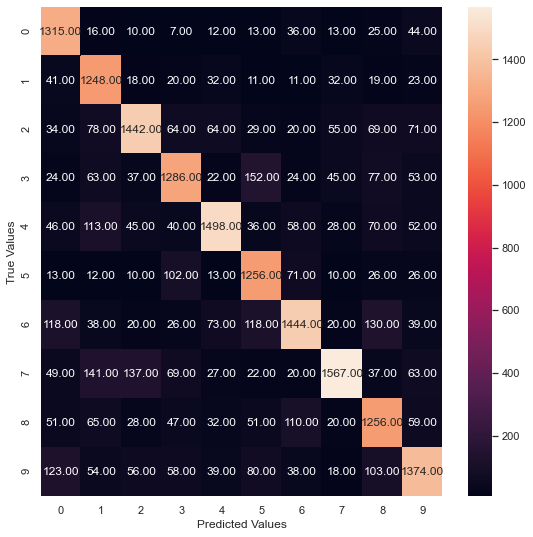

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig = plt.figure(figsize = (9, 9))

y_pred_bn = model.predict(X_test)

y_pred_bn = np.argmax(y_pred_bn, 1)
y_test_bn = np.argmax(y_test, 1)

conf = confusion_matrix(y_test_bn, y_pred_bn)

a = sns.heatmap(conf.T, annot=True, fmt='.2f', cmap=sns.color_palette("rocket", as_cmap = True))
plt.xlabel('Predicted Values')
plt.ylabel('True Values')